In [18]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import shuffle
%matplotlib inline

In [19]:
airline_tweets = pd.read_csv("Tweets.csv")

airline_tweets.head()
airline_tweets.shape

(14640, 15)

6.0
4.0


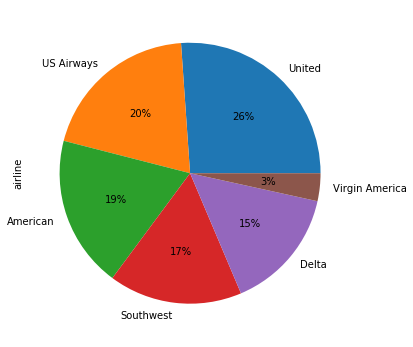

In [20]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

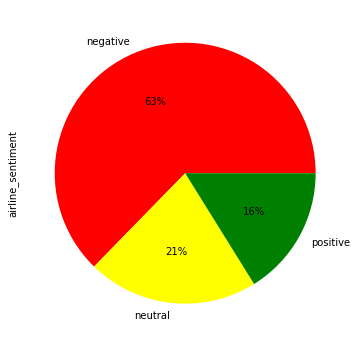

In [21]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

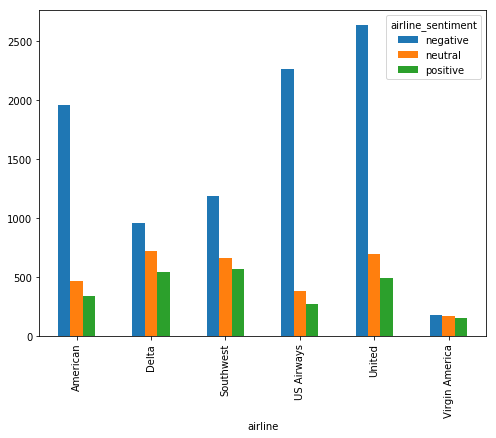

In [22]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

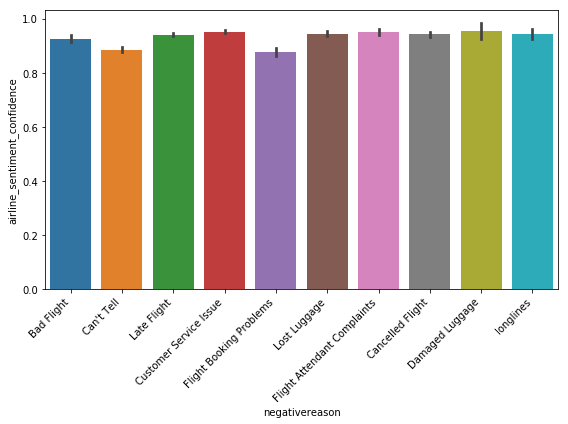

In [23]:
import seaborn as sns

ax=sns.barplot(x='negativereason', y='airline_sentiment_confidence' , data=airline_tweets)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [24]:
airline_tweets=shuffle(airline_tweets)

features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

print(features)

['@USAirways we were moved to a delta direct. Thank you for the accommodations!'
 '@JetBlue if there is a "processing error" the  why do you send out full flight tickets and confirmations? #FlySouthwest'
 "@USAirways 3 hrs on hold. Husband has decided we should sleep in shifts so we don't miss the phone rep. to reschedule"
 ...
 '@united It isnt simple issue, generally how you set up check in/baggage policies at Logan and general unhelpfulness of employees in early AM'
 '@SouthwestAir got it squared away. Thank you. I had a man on the inside help me out!'
 "@USAirways So you understand why I'm resorting to Twitter: No help available at  gate while this occurred or by phone afterward."]


In [36]:
# Data Cleaning

processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()
    
    #print(processed_feature)

    processed_features.append(processed_feature)
    

In [40]:
#Get a bag of words
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features)
print(vectorizer.get_feature_names())

['00', '000', '05', '10', '100', '1000', '10pm', '11', '12', '13', '130', '136', '14', '140', '15', '150', '15th', '16', '17', '18', '180', '19', '1hr', '1k', '1st', '20', '200', '2014', '2015', '20min', '21', '22', '23', '24', '24hrs', '25', '26', '27', '28', '2day', '2hrs', '2nd', '2x', '30', '300', '30am', '30min', '30pm', '32', '35', '36', '39', '3am', '3hrs', '3pm', '3rd', '3x', '40', '400', '42', '433', '45', '45min', '48', '4th', '50', '500', '51', '55', '59', '5hrs', '5th', '60', '600', '65', '6am', '6pm', '70', '700', '719', '728', '737', '747', '75', '777', '787', '7am', '80', '800', '8am', '8pm', '90', '99', 'a320', 'aa', 'aadvantage', 'abc', 'able', 'abq', 'absolute', 'absolutely', 'absurd', 'abt', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accommodate', 'accommodations', 'according', 'account', 'accounts', 'acct', 'accurate', 'across', 'act', 'actions', 'actual', 'actually', 'add', 'added', 'adding', 'additional', 'address', 'admirals', 'advance', 'advanta

In [41]:
#Splitting TRaining and Testing Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [42]:
#Fitting the classifier to the training set
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
#Prediction on the test set
predictions = text_classifier.predict(X_test)

In [44]:
#Perfornmance Indicators

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1718   91   35]
 [ 342  230   56]
 [ 138   63  255]]
              precision    recall  f1-score   support

    negative       0.78      0.93      0.85      1844
     neutral       0.60      0.37      0.45       628
    positive       0.74      0.56      0.64       456

   micro avg       0.75      0.75      0.75      2928
   macro avg       0.71      0.62      0.65      2928
weighted avg       0.74      0.75      0.73      2928

0.7523907103825137
